# Digit Recognizer

#### Alvee Hoque 8/8/2020

#### Objective: 
- Build a Convulutional Neural Network for digit recognition that is trained with the MNIST dataset. 
- Predict on test set and submit predictions

#### Dataset:
- From [kaggle](https://www.kaggle.com/c/digit-recognizer/data) Digit Recognizer Prediction Competition

### Imports

In [13]:
# Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

In [14]:
# sklearn and keras libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.constraints import max_norm

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

### Load Data

In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [16]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


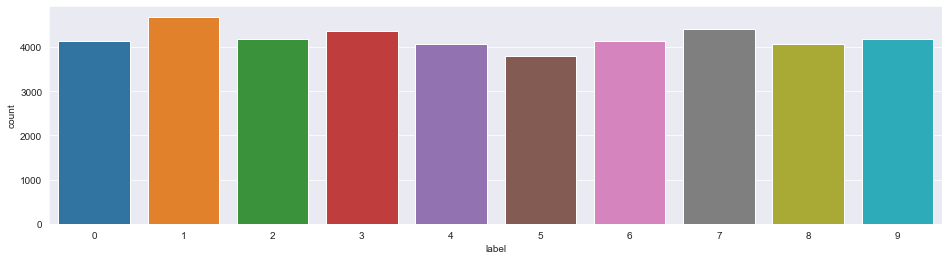

In [17]:
plt.figure(figsize=(16,4))
sns.countplot(train.label)

In [18]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [19]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [20]:
# Separate Targets from Features
target = train['label']
train.drop(['label'], axis=1, inplace=True)

In [21]:
# Normalize Data
# Perform Grayscale Normalization

train = train / 255
test = test / 255

In [22]:
# Reshape image in 3 dimensions (28 x 28 x 1) 
# If this was an RGB Image, then it would have been 28 x 28 x 3

train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [23]:
# One Hot Encoding
target = to_categorical(target, num_classes=10)

In [24]:
# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

In [25]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=28, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.25))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.add(Conv2D(filters=56, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=56, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.25))

In [16]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(10, activation='softmax'))

In [17]:
# optimizer
rms_optim = RMSprop(lr=.001, rho=.9, epsilon=1e-8)
adam_optim = Adam()

In [18]:
model.compile(optimizer=rms_optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=.5,
                                           min_lr=.00001)
epochs = 30
batch_size = 96

In [30]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=10,
                            zoom_range=.1,
                            width_shift_range=.1,
                            height_shift_range=.1,
                            horizontal_flip=False,
                            vertical_flip=False)

datagen.fit(X_train)

In [31]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                   epochs=epochs,
                   validation_data=(X_test, y_test),
                   verbose=2,
                   steps_per_epoch=X_train.shape[0]//batch_size,
                   callbacks=[learning_rate_reduction])

Epoch 1/30
350/350 - 16s - loss: 0.1569 - acc: 0.9528 - val_loss: 0.0397 - val_acc: 0.9869
Epoch 2/30
350/350 - 16s - loss: 0.1123 - acc: 0.9654 - val_loss: 0.0285 - val_acc: 0.9907
Epoch 3/30
350/350 - 16s - loss: 0.0892 - acc: 0.9728 - val_loss: 0.0306 - val_acc: 0.9899
Epoch 4/30
350/350 - 16s - loss: 0.0828 - acc: 0.9750 - val_loss: 0.0260 - val_acc: 0.9921
Epoch 5/30
350/350 - 16s - loss: 0.0705 - acc: 0.9788 - val_loss: 0.0215 - val_acc: 0.9932
Epoch 6/30
350/350 - 16s - loss: 0.0668 - acc: 0.9801 - val_loss: 0.0307 - val_acc: 0.9902
Epoch 7/30
350/350 - 16s - loss: 0.0597 - acc: 0.9831 - val_loss: 0.0201 - val_acc: 0.9930
Epoch 8/30
350/350 - 16s - loss: 0.0588 - acc: 0.9830 - val_loss: 0.0202 - val_acc: 0.9937
Epoch 9/30
350/350 - 16s - loss: 0.0547 - acc: 0.9837 - val_loss: 0.0177 - val_acc: 0.9940
Epoch 10/30
350/350 - 16s - loss: 0.0513 - acc: 0.9845 - val_loss: 0.0198 - val_acc: 0.9933
Epoch 11/30
350/350 - 16s - loss: 0.0508 - acc: 0.9847 - val_loss: 0.0202 - val_acc: 0.99

In [32]:
history.history

{'loss': [0.15686362496444156,
  0.1123208326340786,
  0.08916609133460691,
  0.0828034118217017,
  0.07049970754289202,
  0.06683466601917254,
  0.05965457961828049,
  0.05884822723123112,
  0.05467794132219361,
  0.051285268675003735,
  0.0507504221810294,
  0.0477037164239612,
  0.04113663064582007,
  0.039712223580073834,
  0.037147720301789894,
  0.03812074408068188,
  0.03601095977156157,
  0.03121148861479014,
  0.031657424926524985,
  0.030950034598520557,
  0.03102595004070151,
  0.029348949592926405,
  0.030336580097708586,
  0.02796773725896076,
  0.027524153877914483,
  0.02640617552238317,
  0.02625229276251048,
  0.028814119142313886,
  0.02537990760307626,
  0.02609861871884537],
 'acc': [0.9527976,
  0.96541667,
  0.97279763,
  0.97502977,
  0.97877973,
  0.9800893,
  0.983125,
  0.9829762,
  0.9836607,
  0.98449403,
  0.9846726,
  0.9861607,
  0.9882143,
  0.9882143,
  0.98901784,
  0.9886905,
  0.9892857,
  0.9902381,
  0.9904762,
  0.99044645,
  0.9902679,
  0.991011

In [33]:
plt.figure(figsize=(12,6))



<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [34]:
losses = pd.DataFrame(model.history.history)

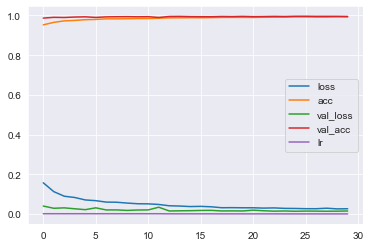

In [35]:
losses.plot()

In [36]:
# Prediction with model

y_pred = model.predict(X_test)

In [37]:
y_predclasses = np.argmax(y_pred, axis=1)

In [38]:
y_true = np.argmax(y_test, axis=1)

In [42]:
mtrx = confusion_matrix(y_true, y_predclasses)

In [44]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_true, y_predclasses, digits=4))

              precision    recall  f1-score   support

           0     0.9975    0.9963    0.9969       816
           1     0.9967    0.9978    0.9973       909
           2     0.9988    0.9941    0.9964       846
           3     0.9968    0.9979    0.9973       937
           4     0.9940    0.9928    0.9934       839
           5     0.9943    0.9943    0.9943       702
           6     0.9936    0.9949    0.9943       785
           7     0.9978    0.9955    0.9966       893
           8     0.9881    0.9964    0.9922       835
           9     0.9916    0.9893    0.9904       838

    accuracy                         0.9950      8400
   macro avg     0.9949    0.9949    0.9949      8400
weighted avg     0.9950    0.9950    0.9950      8400



In [ ]:
classification_report()

In [49]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')

In [50]:
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), results], axis = 1)

In [51]:
submission.to_csv("cnn_mnist_datagen.csv", index=False)